# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

***

You have already solved the first exercise, so you can start from there (you've done taken advantage of the Elbow Method).

Plot the data with 2, 3 and 5 clusters. What do you think that means?

Finally, import the CSV with the correct answers (iris_with_answers.csv) and check if the clustering worked as expected. Note that this is not how we usually go about clustering problems. If we have the answers prior to that, we would go for classification (e.g. a logistic regression).

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [5]:
# Load the data
data = pd.read_csv('iris-dataset.csv')
# Check the data
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

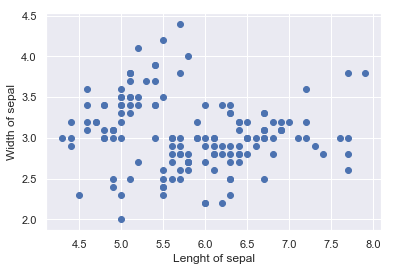

In [6]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(data['sepal_length'],data['sepal_width'])
# name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

## Clustering (unscaled data)

In [7]:
# create a variable which will contain the data for the clustering
x = data.copy()
# create a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
# create a copy of data, so we can see the clusters next to the original data
clusters = data.copy()
# predict the cluster for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)

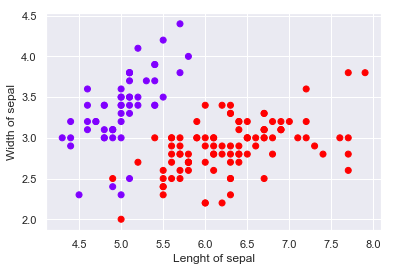

In [10]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

## Standardize the variables

Import and use the <i> scale </i> method from sklearn to standardize the data. 

In [13]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(data)

## Clustering (scaled data)

In [14]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
# create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

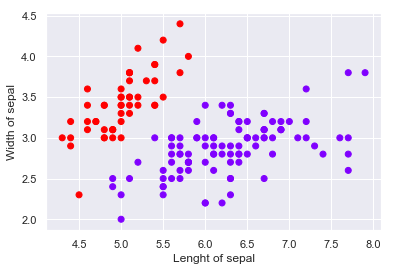

In [16]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

Looks like the two solutions are identical. That is because the original features have very similar scales to start with!

## Take Advantage of the Elbow Method

### WCSS

In [17]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. 
# We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 223.73200573676343,
 140.96581663074699,
 114.64461415589163,
 91.19197002146464,
 80.75779110759109,
 72.21856618691493,
 63.0108561151952,
 55.69465309287077]

### The Elbow Method

Text(0,0.5,'Within-cluster Sum of Squares')

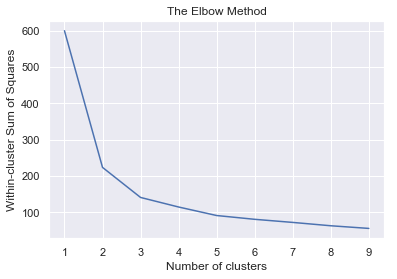

In [18]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

## Understanding the Elbow Curve

Construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, 2, 3 or 5 seem the most likely.

## 2 clusters

Start by separating the standardized data into 2 clusters (you've already done that!)

In [19]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(x_scaled)

# create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

Construct a scatter plot of the original data using the standardized clusters

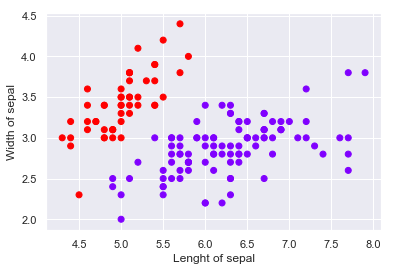

In [20]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

## 3 clusters
Redo the same for 3 and 5 clusters

In [22]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(3)
# fit the data
kmeans_scaled.fit(x_scaled)

# create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

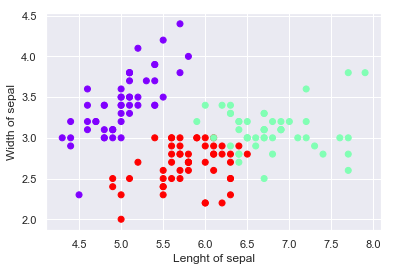

In [23]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

## 5 clusters

In [26]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(5)
# fit the data
kmeans_scaled.fit(x_scaled)

# create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

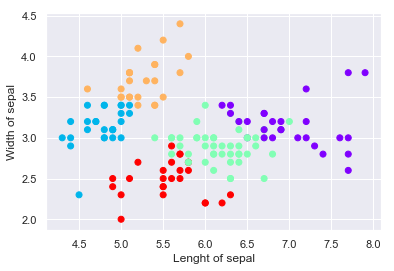

In [27]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

## Compare your solutions to the original iris dataset

The original (full) iris data is located in <i>iris_with_answers.csv</i>. Load the csv, plot the data and compare it with your solution. 

Obviously there are only 3 types, because that's the original (truthful) iris dataset.

The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [28]:
data_with_answer = pd.read_csv('iris-with-answers.csv')

In [30]:
data_with_answer.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [32]:
data_with_answer['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [33]:
data_with_answer['species'] = data_with_answer['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

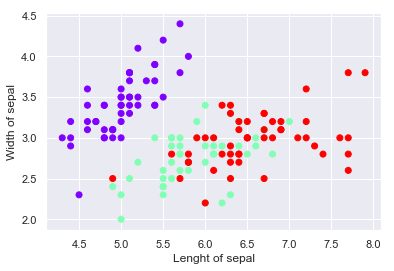

In [34]:
plt.scatter(data_with_answer['sepal_length'], data_with_answer['sepal_width'], c=data_with_answer['species'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

## Use classification to predict

Classification is a much better technique to predict output category given input features

In [38]:
data_with_answer.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
reg_logit = LogisticRegression()

#### Declare variables 

In [41]:
y = data_with_answer['species']
x = data_with_answer.drop(labels='species', axis=1)
reg_logit.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Make predictions 

In [42]:
y_predict = reg_logit.predict(x)

In [43]:
reg_results = data_with_answer.copy()
reg_results['species_predicted'] = y_predict

#### Plot the clustering based on predictions

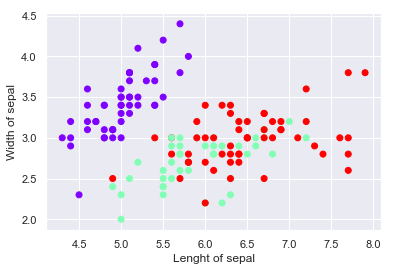

In [44]:
plt.scatter(reg_results['sepal_length'], reg_results['sepal_width'], c=reg_results['species_predicted'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

#### Calculate prediction accuracy 

In [48]:
predict_accuracy = reg_results.iloc[:,-2:]

In [55]:
predict_accuracy['good_prediction'] = (predict_accuracy['species'] == predict_accuracy['species_predicted'])
predict_accuracy.head()

,species,species_predicted,good_prediction
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True


In [56]:
predict_accuracy['good_prediction'] = predict_accuracy['good_prediction'].map({True:1, False:0})

In [62]:
accuracy = predict_accuracy['good_prediction'].sum() / predict_accuracy.shape[0]
accuracy

0.96